<a href="https://colab.research.google.com/github/federicoding/TrainingGeneral/blob/main/Regression_rapide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'idée de ce fichier est d'être, à la fois un **entrainement** et une **fiche technique** pour faire rapidement (limite *quick & dirty*) un modèle de régression.

#Boston House Prices

#Méthode fast & bourrin

*I.e.* sans prévisualisation

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [6]:
bt = load_boston()
housing = pd.DataFrame(data = bt.data, columns = bt.feature_names)
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
housing['Price'] = bt.target
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


On va définir la cible (et l'enlever du **X**) et commencer à split le `DataFrame`

In [9]:
from sklearn.model_selection import train_test_split

X = housing.drop('Price', axis=1)
Y = housing.Price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

On importe la classe de régression linéaire

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

On *entraine* **lm** sur **X_train** et **Y_train**

In [13]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Affichage de l'intercept estimé:

In [14]:
print("L'Intercept estimé est :", lm.intercept_)

L'Intercept estimé est : 37.9124870097502


Affichage d'un `DataFrame` contenant chaque variable explicative et son coefficient estimé par le modéle associé:

In [15]:
pd.DataFrame({'coefficients estimés': lm.coef_}, index= X_train.columns)

,coefficients estimés
CRIM,-0.130800
ZN,0.049403
INDUS,0.001095
CHAS,2.705366
NOX,-15.957050
RM,3.413973
AGE,0.001119
DIS,-1.493081
RAD,0.364422
TAX,-0.013172


Petit nuage de points pour voir la relation RM et PRICE

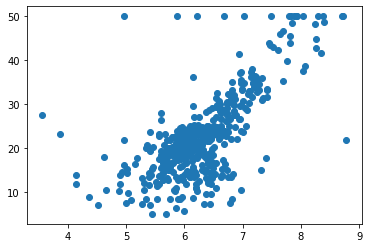

In [16]:
plt.scatter(housing.RM, housing.Price)

*  calcul et affichage (des 5 première valeurs) pour **X_test**
*   Comparaison d'avec les 5 premières valeurs de **Y_test**

In [18]:
print(pd.DataFrame((lm.predict(X_test)[:5],Y_test[:5])))

           0          1          2          3          4
0  37.563118  32.144451  27.065736   5.670806  35.099826
1  37.600000  27.900000  22.600000  13.800000  35.200000


Graphiquement on vérifie le modèle. Tout simplement on mets en vis-à-vis les Y_test et les Y_pred et on rajoute la droite d'équation **y=x**

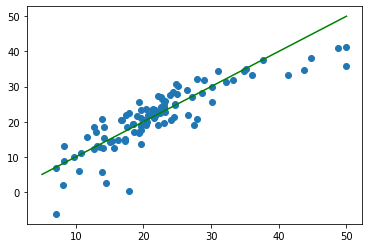

In [19]:
plt.scatter(Y_test, lm.predict(X_test))
x = np.linspace(5,50)
plt.plot(x,x,'g')

La méthode **lm.score** permet de calculer le coefficient de détermination **R²**, compris entre 0 et 1. Le plus proche de 1 étant le mieux pour le pouvoir prédictif du modèle

In [22]:
lm.score(X_test,Y_test)

0.7334492147453086

Pour la sacro-sainte **mean squared error** il faut passer par un module **sklearn.metrics**

Plus elle est proche de **zéro**, meilleures sont les prédictions.

In [23]:
from sklearn.metrics import mean_squared_error

print('Erreur quadratique moyenne: ', mean_squared_error(Y_test, lm.predict(X_test)))

Erreur quadratique moyenne:  20.869292183770735


Modèlisation via **régression Lasso**

Il faut importer la classe. On crée une régression avec constante de régulatisation `alpha = 0.3`

In [24]:
from sklearn.linear_model import Lasso

rl = Lasso(alpha = 0.3)

In [25]:
#on entraine le modèle

rl.fit(X_train,Y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Affichage du `DataFrame` variables explicatives et coefficients associés

In [27]:
pd.DataFrame({'coefficients estimés': rl.coef_}, index = X_train.columns)

,coefficients estimés
CRIM,-0.114418
ZN,0.055058
INDUS,-0.018492
CHAS,0.000000
NOX,-0.000000
RM,2.596070
AGE,0.001830
DIS,-1.077792
RAD,0.342547
TAX,-0.016097


Comparaison, *useless* des deux modèles

In [29]:
print("Prédictions : ", rl.predict(X_test)[0:5])
print("Prédictions : ", lm.predict(X_test)[0:5])
print("Valeurs réelles : ",  list(Y_test[0:5]))

Prédictions :  [36.39914787 32.21115005 26.69827134  4.60390244 31.59396488]
Prédictions :  [37.56311787 32.14445143 27.06573629  5.67080633 35.09982577]
Valeurs réelles :  [37.6, 27.9, 22.6, 13.8, 35.2]


Affichage du **coefficient de détermination** et de **l'erreur quadratique moyenne** des prédictions

In [30]:
print("Coefficient de détermination: ", rl.score(X_test, Y_test)) 
print("Erreur quadratique : ", mean_squared_error(Y_test ,rl.predict(X_test)))

Coefficient de détermination:  0.6886679452379977
Erreur quadratique :  24.37539101899
